<a href="https://colab.research.google.com/github/AlexanderSlokov/aiClassPracticeAssignments/blob/main/MidTermExam_VietnameseCuisine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# Libraries to preprocessing images
from os import listdir
from numpy import asarray, save
from keras.utils import img_to_array
from keras.utils import load_img

In [28]:
# Access Drive Folder
import matplotlib.pyplot as plt
from matplotlib.image import imread 
folder = '/content/drive/MyDrive/AI Picture Datasets Resized/BulkResizePhotosVietnameseCuisine/'

In [29]:
# Read the images and its name
photos, labels = list(), list()
for file in listdir(folder):
  output = 0

  if file.startswith('banhchung'):
    output = 1

  if file.startswith('banhgiay'):
    output = 2

  if file.startswith('banhmi'):
    output = 3

  if file.startswith('banhxeo'):
    output = 4

  if file.startswith('chexoinuoc'):
    output = 5
  
  if file.startswith('com'):
    output = 6
  
  if file.startswith('comchay'):
    output = 7

  if file.startswith('goicuon'):
    output = 8  
  
  if file.startswith('vitquay'):
    output = 9  

  if file.startswith('xoigac'):
    output = 10

# Load folder and preprocessing
  photo = load_img(folder + file, target_size = (300, 300))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels =  asarray(labels)


In [30]:
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/AI_data_preprocessing/Midterm_VietnameseCuisine_photos.npy', photos)
save('/content/drive/MyDrive/AI_data_preprocessing/Midterm_VietnameseCuisine_labels.npy', labels)

(500, 300, 300, 3) (500,)


In [31]:
#--------------------------/***/   PART TWO: TRAINING MODEL /***/--------------------------#

In [32]:
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy   
from sklearn.model_selection import train_test_split
# test the model with a custom image
from keras.utils import load_img, img_to_array
import numpy as np

In [33]:
# load the preprocessed data
data = np.load('/content/drive/MyDrive/AI_data_preprocessing/Midterm_VietnameseCuisine_photos.npy')
labels = np.load('/content/drive/MyDrive/AI_data_preprocessing/Midterm_VietnameseCuisine_labels.npy')

In [34]:
# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [35]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(400, 300, 300, 3)
(400,)
(100, 300, 300, 3)
(100,)


In [36]:
x_train_reshape = x_train.reshape(400, 300, 300, 3)
train_reshape = x_train_reshape.astype('float32')/255

x_test_reshape = x_test.reshape(100, 300, 300, 3)
test_reshape = x_test_reshape.astype('float32')/255

# the to_cactagorical line must only run 1 time in a session

In [37]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [38]:
model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3), activation='relu', input_shape = (300, 300, 3), padding = 'same'))
model.add(Dropout(0.26))
model.add(MaxPooling2D(
    (2,2), padding = 'same')
)

model.add(Conv2D(
    64, (3,3), activation = 'relu', padding = 'same'
))
model.add(Dropout(0.26))
model.add(MaxPooling2D(
    (2,2), padding = 'same')
)

model.add(Conv2D(
    128, (3,3), activation = 'relu', padding = 'same'
))
model.add(Dropout(0.26))
model.add(MaxPooling2D(
    (2,2), padding = 'same')
)

# The ANN
model.add(Flatten())
# Hidden layers
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.26))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(11, activation = 'Softmax'))

In [39]:
# compile the model
model.compile(loss  = categorical_crossentropy, optimizer=Adam(), metrics = ['accuracy'])
# train the model
train = model.fit(x_train, y_train, batch_size = 64, epochs = 15, verbose = 1)

Epoch 1/15
7/7 [==============================] - 144s 19s/step - loss: 1913.9165 - accuracy: 0.1000
Epoch 2/15
7/7 [==============================] - 142s 20s/step - loss: 7.5934 - accuracy: 0.2275
Epoch 3/15
7/7 [==============================] - 127s 18s/step - loss: 2.1204 - accuracy: 0.3325
Epoch 4/15
7/7 [==============================] - 125s 18s/step - loss: 1.9387 - accuracy: 0.3625
Epoch 5/15
7/7 [==============================] - 128s 18s/step - loss: 1.5657 - accuracy: 0.4875
Epoch 6/15
7/7 [==============================] - 125s 18s/step - loss: 1.1601 - accuracy: 0.6300
Epoch 7/15
7/7 [==============================] - 132s 19s/step - loss: 1.1189 - accuracy: 0.6650
Epoch 8/15
7/7 [==============================] - 126s 18s/step - loss: 0.6488 - accuracy: 0.7775
Epoch 9/15
7/7 [==============================] - 126s 18s/step - loss: 0.5335 - accuracy: 0.8225
Epoch 10/15
7/7 [==============================] - 127s 18s/step - loss: 0.4257 - accuracy: 0.8400
Epoch 11/15
7/7 

In [41]:
model.save('/content/drive/MyDrive/AI_data_preprocessing/VietnameseCuisineTrained1.h5')

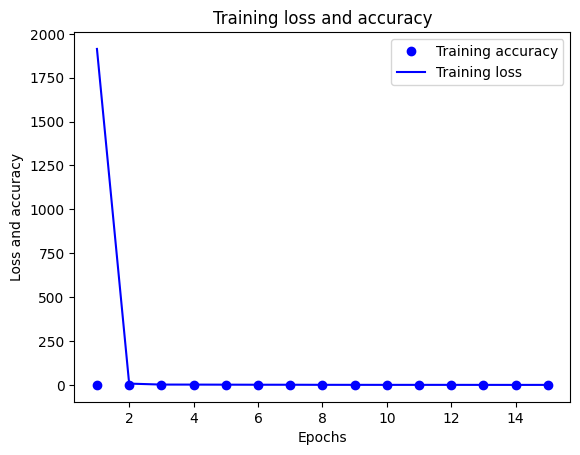

In [43]:
loss, accuracy = model.evaluate(x_test, y_test, verbose = 0)
loss = train.history['loss']
accuracy = train.history['accuracy']

# Plot the training loss and accuracy curves
epochs = np.arange(1, 16)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss and accuracy')
plt.legend()
plt.show()

In [44]:
# evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 [==============================] - 8s 2s/step - loss: 1.4749 - accuracy: 0.6000
Test Loss: 1.4748566150665283
Test Accuracy: 0.6000000238418579
